Understanding Problem Statement
Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#importing dataset to jupyter notebook
train=pd.read_csv("E:/analyticv/train.csv")

In [8]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [9]:
train.shape

(6650, 11)

In [10]:
#checking null values    
train.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [11]:
#There is no missing value in the data set so we can jump to explore it. We can start with the target variable:
train.Is_Churn.value_counts()


0    5113
1    1537
Name: Is_Churn, dtype: int64

Target variable has imbalanced class distribution. Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.


In [12]:
#Let’s first discover the features that only have two values.
columns = train.columns
binary_cols = []
for col in columns:
    if train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [13]:
binary_cols

['Gender', 'Transaction_Status', 'Credit_Card', 'Is_Churn']

Income and credit category are more than two categorical


C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91979\anaconda3\lib\si

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

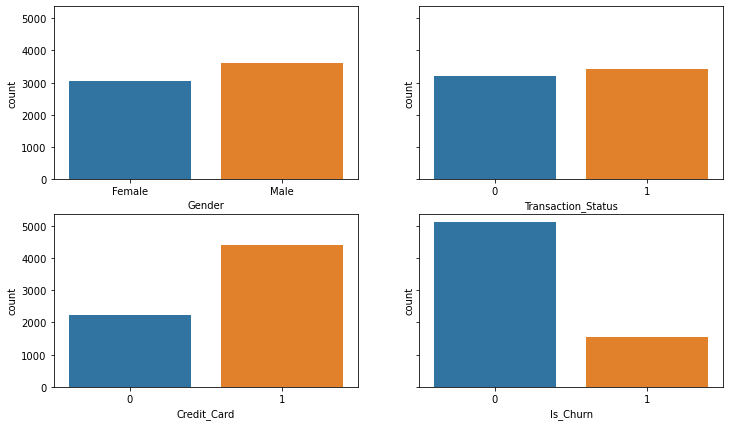

In [14]:
#Binary Categorical Features
#Let’s check the class distribution of binary features.
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=True)
sns.countplot("Gender", data=train, ax=axes[0,0])
sns.countplot("Transaction_Status", data=train, ax=axes[0,1])
sns.countplot("Credit_Card", data=train, ax=axes[1,0])
sns.countplot("Is_Churn", data=train, ax=axes[1,1])


we found that churn have imbalance data set.its affect our machine learning model.we need to do sampling techniques resolve that issues.


In [15]:
#Let’s see if churn rate is different for males and females
train[['Gender','Is_Churn']].groupby(['Gender']).mean()

    

,Is_Churn
Gender,
Female,0.25576
Male,0.21041


In [16]:
train[['Balance','Is_Churn']].groupby(['Is_Churn']).mean()  #i think balance variable not important for classifications

,Balance
Is_Churn,
0,788653.739642
1,857626.896461


<AxesSubplot:xlabel='Gender', ylabel='Is_Churn'>

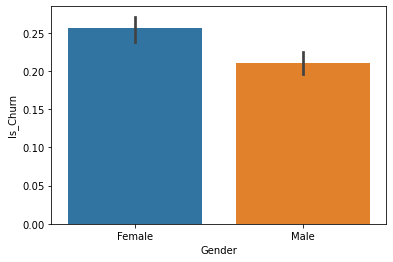

In [17]:
sns.barplot(x='Gender',y='Is_Churn',data=train)

In [18]:
train[['Credit_Category','Is_Churn']].groupby(['Credit_Category']).mean()

,Is_Churn
Credit_Category,
Average,0.230543
Good,0.203135
Poor,0.245449


In [19]:
train[['Income','Is_Churn']].groupby(['Income']).mean()

,Is_Churn
Income,
10L - 15L,0.235544
5L - 10L,0.223064
Less than 5L,0.225048
More than 15L,0.243123


In [20]:
train[['Vintage','Is_Churn']].groupby(['Vintage']).mean()

,Is_Churn
Vintage,
0,0.210251
1,0.242245
2,0.207831
3,0.241281
4,0.247685
5,0.231511


In [21]:
train[['Transaction_Status','Is_Churn']].groupby(['Transaction_Status']).mean() #

,Is_Churn
Transaction_Status,
0,0.268944
1,0.195627


<AxesSubplot:xlabel='Transaction_Status', ylabel='Is_Churn'>

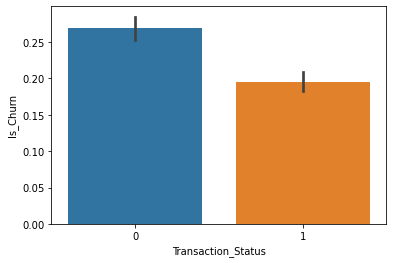

In [22]:
sns.barplot(x='Transaction_Status',y='Is_Churn',data=train)

who not done transaction basically that customer may be leave the bank 26% possible. we got good lead. all the above variable equal to 20% churn.


In [23]:
train[['Credit_Card','Is_Churn']].groupby(['Credit_Card']).mean()  #no lead

,Is_Churn
Credit_Card,
0,0.231631
1,0.230874


In [24]:
train[['Product_Holdings','Is_Churn']].groupby(['Product_Holdings']).mean() #above 20% chances

,Is_Churn
Product_Holdings,
1,0.245625
2,0.217473
3+,0.220149


In [25]:
train.describe()   #overall describe about all numeric variables

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


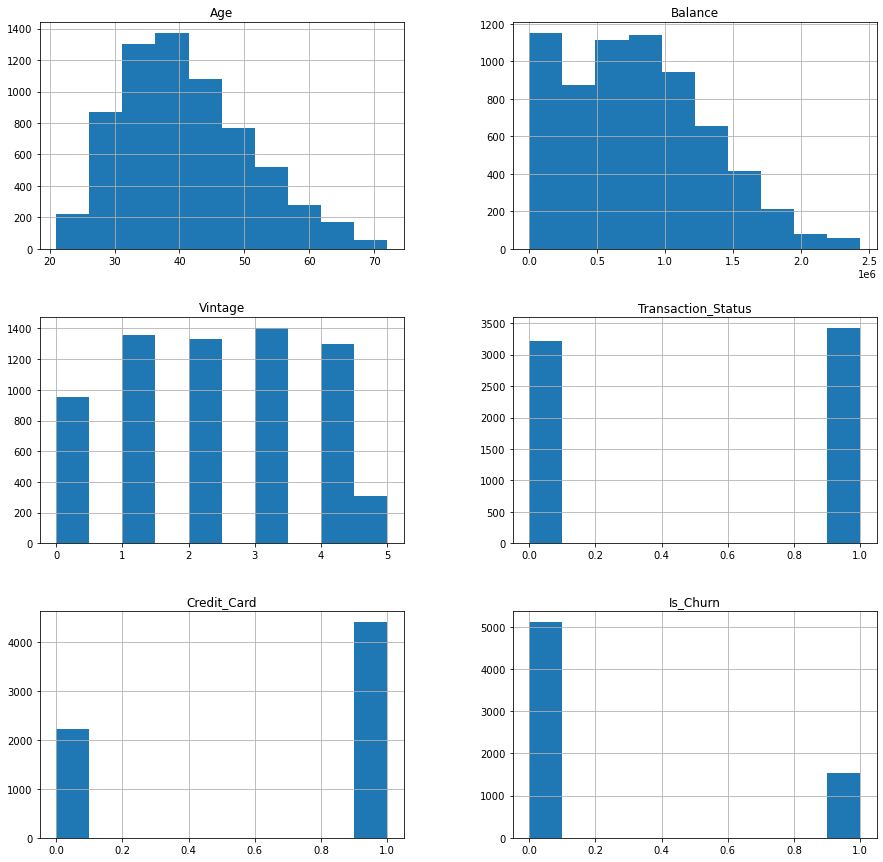

In [26]:
train.hist(figsize=(15,15))      #quick view of data distribution
plt.show()

Handling outliers:-


In [27]:
train.info() #Checking Data types for further Cleaning purpose

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


we need to work on gender, income,product_holdinds,credit category//...

In [28]:
train['Product_Holdings'].value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

In [29]:
train['Income'].value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

Handling Categorical Variables




In [30]:
#converting to numeric
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [31]:
cat_features=['Gender','Credit_Category']
df = pd.get_dummies(train, columns=cat_features, drop_first=True)

In [32]:
df.head()

,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Is_Churn,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,84e2fcc9,36,5L - 10L,563266.44,4,0,1,0,1,0,0,0
1,57fea15e,53,Less than 5L,875572.11,2,1,1,1,0,0,0,1
2,8df34ef3,35,More than 15L,701607.06,2,1,2,0,0,0,0,1
3,c5c0788b,43,More than 15L,1393922.16,0,1,2,1,1,0,0,1
4,951d69c4,39,More than 15L,893146.23,1,1,1,1,1,0,1,0


In [33]:
#Handling income columns
cleanup_nums = {"Income":     {"10L - 15L":1, "5L - 10L": 2,"Less than 5L":3,"More than 15L":4}}
                               

In [34]:
train_new =df.replace(cleanup_nums)
train_new.head()

,ID,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Is_Churn,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,84e2fcc9,36,2,563266.44,4,0,1,0,1,0,0,0
1,57fea15e,53,3,875572.11,2,1,1,1,0,0,0,1
2,8df34ef3,35,4,701607.06,2,1,2,0,0,0,0,1
3,c5c0788b,43,4,1393922.16,0,1,2,1,1,0,0,1
4,951d69c4,39,4,893146.23,1,1,1,1,1,0,1,0


In [35]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    6650 non-null   object 
 1   Age                   6650 non-null   int64  
 2   Income                6650 non-null   int64  
 3   Balance               6650 non-null   float64
 4   Vintage               6650 non-null   int64  
 5   Transaction_Status    6650 non-null   int64  
 6   Product_Holdings      6650 non-null   object 
 7   Credit_Card           6650 non-null   int64  
 8   Is_Churn              6650 non-null   int64  
 9   Gender_Male           6650 non-null   uint8  
 10  Credit_Category_Good  6650 non-null   uint8  
 11  Credit_Category_Poor  6650 non-null   uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 487.2+ KB


In [36]:
train_new.drop(columns="ID",inplace=True)
train_new.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Is_Churn,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,36,2,563266.44,4,0,1,0,1,0,0,0
1,53,3,875572.11,2,1,1,1,0,0,0,1
2,35,4,701607.06,2,1,2,0,0,0,0,1
3,43,4,1393922.16,0,1,2,1,1,0,0,1
4,39,4,893146.23,1,1,1,1,1,0,1,0


In [37]:
train_new.drop(columns="Product_Holdings",inplace=True)
train_new.head()

,Age,Income,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,36,2,563266.44,4,0,0,1,0,0,0
1,53,3,875572.11,2,1,1,0,0,0,1
2,35,4,701607.06,2,1,0,0,0,0,1
3,43,4,1393922.16,0,1,1,1,0,0,1
4,39,4,893146.23,1,1,1,1,0,1,0


Q1 = train_new.quantile(0.25)
Q3 = train_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)                     

print(train_new < (Q1 - 1.5 * IQR)) |(train_new > (Q3 + 1.5 * IQR))

train_out = train_new[~((train_new < (Q1 - 1.5 * IQR)) |(train_new > (Q3 + 1.5 * IQR))).any(axis=1)]
train_out.head()

In [ ]:
FEATURE SELECTIONS:-

[0.30550339 0.0959042  0.3573941  0.14265836 0.01499179 0.03323893
 0.01475897 0.01429872 0.02125154]


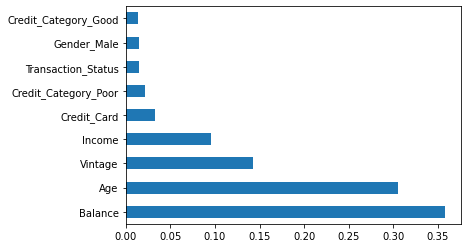

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = train_new.drop("Is_Churn",axis=1)   #Feature Matrix
y = train_new["Is_Churn"]   #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
train_new.shape

(6650, 10)

In [42]:
x= train_new.drop("Is_Churn",axis=1)   #Feature Matrix
y= train_new["Is_Churn"]   

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [184]:
!pip install imbalanced-learn   #My library error...Reinstalling imblearn

In [185]:
from imblearn.over_sampling import SMOTE  #upsampling 

In [187]:
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4655, 9)
Number transactions y_train dataset:  (4655,)
Number transactions X_test dataset:  (1995, 9)
Number transactions y_test dataset:  (1995,)


In [188]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1090
Before OverSampling, counts of label '0': 3565 



In [189]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())


In [190]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (7130, 9)
After OverSampling, the shape of train_y: (7130,) 

After OverSampling, counts of label '1': 3565
After OverSampling, counts of label '0': 3565


In [191]:
#Firest Try Ridgeclassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [192]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(x_train_res, y_train_res) #train the model

RidgeClassifier()

In [193]:
pred = clf_ridge.predict(x_train_res)
accuracy_score(y_train_res, pred)

0.7244039270687237

In [194]:
predict = clf_ridge.predict(x_test)
accuracy_score(y_test, predict)

0.643609022556391

In [195]:
f1_score(y_test, predict, average='macro')

0.5608623221361525

In [196]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score


In [197]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1548
           1       0.31      0.47      0.37       447

    accuracy                           0.64      1995
   macro avg       0.56      0.58      0.56      1995
weighted avg       0.70      0.64      0.67      1995



In [198]:
confusion_matrix(y_test,predict)

array([[1075,  473],
       [ 238,  209]], dtype=int64)

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [201]:
pred = clf_forest.predict(x_train_res)
accuracy_score(y_train_res, pred)

0.5723702664796634

In [202]:
pred_ra = clf_forest.predict(x_test)
accuracy_score(y_test, pred_ra)

0.7764411027568923

In [203]:
confusion_matrix(y_test,pred_ra)

array([[1523,   25],
       [ 421,   26]], dtype=int64)

In [204]:
print(classification_report(y_test,pred_ra))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1548
           1       0.51      0.06      0.10       447

    accuracy                           0.78      1995
   macro avg       0.65      0.52      0.49      1995
weighted avg       0.72      0.78      0.70      1995



In [205]:
from sklearn.model_selection import GridSearchCV    #Hyperparameter Tuning

In [206]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25],'criterion': ['entropy','gini']}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [207]:
clf.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [211]:
clf.best_params_


{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 300}

In [212]:
clf.best_score_


0.7586466165413535

In [213]:
clf_forest = RandomForestClassifier(n_estimators=300, max_depth=15,criterion='entropy')
clf_forest.fit(x_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=300)

In [214]:
pred_train = clf_forest.predict(x_train_res)
accuracy_score(y_train_res, pred_train)

0.9708274894810659

In [215]:
pred_test = clf_forest.predict(x_test)
accuracy_score(y_test, pred_test)

0.6656641604010025

In [216]:
pred_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [217]:
confusion_matrix(y_test,pred_test)

array([[1154,  394],
       [ 273,  174]], dtype=int64)

In [218]:
print(classification_report(y_test,pred_test))


              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1548
           1       0.31      0.39      0.34       447

    accuracy                           0.67      1995
   macro avg       0.56      0.57      0.56      1995
weighted avg       0.70      0.67      0.68      1995



In [219]:
f1_score(y_test, pred_test, average='macro')



0.5593277310924369

In [220]:
f1_score(y_test, pred_test, average='weighted')

0.6787934542237947

In [221]:
f1_score(y_test, pred_test, average='micro')

0.6656641604010025

In [222]:
test_new=pd.read_csv("test_data.csv")

In [224]:
test_new.head()

,Age,Income,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Male,Credit_Category_Good,Credit_Category_Poor
0,50,4,1008636.39,2,1,1,0,0,0
1,36,2,341460.72,2,0,1,1,0,0
2,25,1,439460.10,0,0,1,0,1,0
3,41,3,28581.93,0,1,1,1,0,1
4,48,4,1104540.03,2,1,0,1,1,0


In [225]:
test = clf_forest.predict(test_new)

In [226]:
test

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [228]:
raw_test=pd.read_csv("E:/analyticv/test.csv")

In [229]:
raw_test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [232]:
ID= raw_test['ID']
submission_2 = pd.DataFrame({
                  "ID": ID, 
                  "Is_churn": test})

In [233]:
submission_2.to_csv('submission_final.csv', index=False)